In [3]:
%matplotlib inline
import pandas as pd

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Ligaw na daigdig,1962
1,Sluby ulanskie,1934
2,The House of the Seven Gables,1940
3,Mandala - Il simbolo,2008
4,Shi bian,1958


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

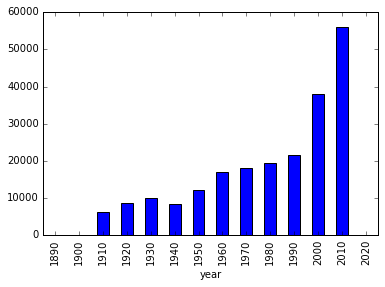

In [7]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

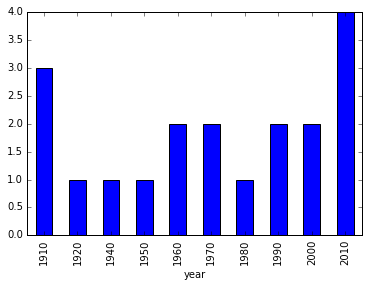

In [8]:
t = titles[titles.title == "Hamlet"]
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [17]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      605
      actress    278
1951  actor      636
      actress    273
1952  actor      592
      actress    284
1953  actor      635
      actress    294
1954  actor      631
      actress    298
1955  actor      614
      actress    271
1956  actor      621
      actress    294
1957  actor      711
      actress    289
1958  actor      700
      actress    278
1959  actor      685
      actress    299
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [18]:
c = cast
c = c[c.year // 10 == 195]
c = c[(c.n >= 1) & (c.n <=5)]
c.groupby(['year', 'n','type']).size()

year  n  type   
1950  1  actor      605
         actress    278
      2  actor      425
         actress    402
      3  actor      495
         actress    307
      4  actor      522
         actress    264
      5  actor      552
         actress    219
1951  1  actor      636
         actress    273
      2  actor      440
         actress    423
      3  actor      549
         actress    286
      4  actor      566
         actress    250
      5  actor      570
         actress    249
1952  1  actor      592
         actress    284
      2  actor      429
         actress    419
      3  actor      521
         actress    296
      4  actor      513
         actress    277
      5  actor      538
         actress    221
                   ... 
1957  1  actor      711
         actress    289
      2  actor      470
         actress    493
      3  actor      592
         actress    320
      4  actor      577
         actress    305
      5  actor      568
         actress    278

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [23]:
c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort('n').groupby(['year'])[['n']].max()
c

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,n
year,
1963,15
2006,50
2016,NaN


### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [76]:

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year','title']).size()
g
# g[g > 1].order()


year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  An American Werewolf in London                    2
      The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Superman III                                      1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Sesame Street Presents: Follow that Bird          3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  Innocent Blood                                    1
      The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brother

### List each of the characters that Frank Oz has portrayed at least twice.

In [75]:

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 2].order()

/home/ubuntu/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


character
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64